In [111]:
# 

# Importar librerías, nombres archivo.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
sources = ['emol1', 'emol2','reddit1', 'reddit2','youtube1', 'youtube2','twitter1', 'twitter2','telegram1', 'telegram2']
""" 
lugares v1
Emol 0
Reddit 2
Youtube 4
Twitter 6
Telegram 8
"""

' \nv1\nEmol 0\nReddit 2\nYoutube 4\nTwitter 6\nTelegram 8\n'

### Procesar y exportar la información.

In [149]:
#valor_csv = 0
df_list = []
for valor_csv in range(len(sources)):
    # Se saca el 'content' porque no es necesario y estorba
    df = pd.read_csv("csv/"+sources[valor_csv]+".csv")
    df = df.drop(columns=['content'])
    # Obtener IQR para determinar outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Agregar datos
    fuente = [sources[valor_csv]] * 20
    n_datos = [len(df)]*20
    df_max = pd.DataFrame(zip(n_datos, fuente, df.columns, (df > (Q3 + 1.5 * IQR)).sum(), (df > (Q3 + 1.5 * IQR)).sum()/df.count(), (Q3+1.5*IQR), df.max()), columns=['n_datos','fuente','factor','outlierCount','outlier%','maxIQR','maximo'])
    df_list.append(df_max)
df_list = pd.concat(df_list)

# Exportar
df_list.to_excel("maximos.xlsx")

### Calculo de errores muestrales

In [103]:
z_score = 1.96 # Z score con un alfa de 0.05, 2 colas
iqr_b = 0
for i in range(len(sources)):
    df_err = pd.read_csv(sources[i])
    if(iqr_b):
        Q1 = df_err.quantile(0.25)
        Q3 = df_err.quantile(0.75)
        IQR = Q3 - Q1
        std = IQR
    else:
        std = df_err.std()
    sample_error = z_score * std.mean() / math.sqrt(len(df))
    print("{0}\t{1}".format(sources[i], sample_error))

csv/emol1.csv : 0.054586609831362085
csv/emol2.csv : 0.007962951539881573
csv/reddit1.csv : 0.061222402781263396
csv/reddit2.csv : 0.007597502073075413
csv/youtube1.csv : 0.036977715786044245
csv/youtube2.csv : 0.004847013980797479
csv/twitter1.csv : 0.043671211283336016
csv/twitter2.csv : 0.011088506190197408
csv/telegram1.csv : 0.022273183292712224
csv/telegram2.csv : 0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d3bb354a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3bb3747c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3bb354340>,
 'medians': [<matplotlib.lines.Line2D at 0x1d3bb385580>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d3bb385c40>,
 'means': []}

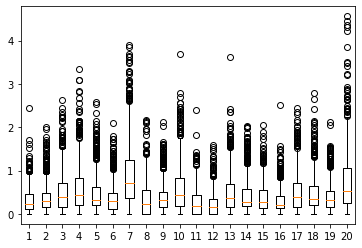

In [123]:
# TEST - Cargar datos y procesarlos - Leer comment de [0]
valor_csv = 4
df = pd.read_csv("csv/"+sources[valor_csv]+".csv")
df = df.drop(columns=['content'])
plt.boxplot(df)